# 从非参数到机器学习

近年来，机器学习发展势头迅猛，其思想广泛应用于各个领域，从学术研究到生活日常都能见到它的身影。{cite}`friedman2001elements` 是一篇适合研究生入门的权威文献。当中机器学习的思想也能够应用于经济学的研究中。{cite}`athey2018impact` 讨论了机器学习技术对经济学分析的冲击；{cite}`mullainathan2017machine` 研究了一些常见的方法并用实例加以展示；{cite}`taddy2018technological` 介绍了新技术 **人工智能** 和背后暗含的经济学模型。

两个机器学习中常用的方法是 **监督学习** 和 **非监督学习** 。简单来说，前者是研究 $X$ 和 $Y$ 的关系，而后者则仅研究 $X$ 。前者在实际中的例子是各种的回归和分类方法，后者的常见应用则是密度分析、主成分分析和聚类分析等。上述例子都是熟悉的计量经济学问题。

从计量经济学者的视角来看，监督机器学习就是通过拟合样本数据来预测样本外的规律。我们可以借用回归的知识来理解背后的原理——如果重复 $n$ 次试验得到数据集 $(y_i, x_i)_{i=1}^n$ ，在已知 $x_{n+1}$ 时通过什么方法能够精准预测 $y_{n+1}$ 呢？

机器学习是跳出传统统计学的全新研究范式。当统计学者提出一种估计量时，常规的流程是逐个推导它的三大性质（相合性，有效性和无偏性）。一般先证明相合性，这是统计量的基本要求。在此基础上，我们还要找出它的渐进分布。理想情况下，渐近分布是正态的，这样统计量就会有一些便捷的性质，统计推断也更加方便。而且，我们还希望渐近正态估计量满足有效性。有效性要求估计量在一系列的渐近正态估计量中有最小的方差。不仅如此，计量经济学者们还关心实证结果中的模型识别和经济学解释。计量经济学主要处理数据和模型之间的关系。从总体水平看，我们需要考虑识别的问题。一旦我们关心的参数识别成功，我们就可以进行参数估计和推断。最后，我们解读这些结果，并希望它们能够对经济学理论提供一些参考。


机器识别则不需要经过这些流程。首先，它们认为数据集足够大的时候，方差通常都会很小，因此不需要考虑有效性的问题。其次，在许多的情况中我们并不关心统计推断的结果，因此我们不必在意推断的步骤。例如，亚马逊或者淘宝的推荐算法背后就是机器学习在支持，我们真正关心的是预测的准确性，而不会在意A商品的消费者倾向于购买B商品背后的因果关系。再者，这个世界是一个非常复杂的系统，我们不可能清楚知道数据生成的具体机制。我们无需假定一个数据生成机制(data generating process DGP)。如果DGP不存在，那么我们根本无需谈论相合性的存在与否。如果没有所谓的“真实值”存在，估计量又怎么会收敛呢？基于上述的讨论，传统统计学的范式显然不再可靠。放到计量经济学中，这样观点无疑否认了结构化模型传统方法(the Cowles approach)。

对于这些“辩论”感兴趣的读者可以参考 {cite}`breiman2001statistical`。在本章节的学习中，我们暂不讨论这些辩论，而是学习经济学中较为流行的几种机器学习方法。

## 非参数估计
**参数化** 涉及的是参数数量有限的问题，而 **非参数** 则是指参数无限的情况。对于统计学者来说，非参数不是什么新鲜事物。不过，这个理论中的一些思路与机器学习有着千丝万缕的联系。

以一个给定样本 $(x_1,\ldots,x_n)$ 的密度估计为例，如果我们假设样本来源于参数族，比如正态分布，就可以用最大似然估计来求得均值和方差。然而，如果选错了参数族，极大似然估计就不相合了，我们最多得到一个**伪真实值**(*pseudo true value*)。在现实中，我们往往无法判断哪个是正确的参数族。如果我们不假设参数族，那么理论上我们就应该用无限参数去表示密度。直方图就是一个大家都熟悉的非参数估计，直方图的形状取决于底部的分区，如果分得太细，每个部分里只有少数几个观测值。尽管偏误很小，但是数据就会有很大的方差。相反，如果分类过于粗糙，每个部分会很宽。尽管它的方差很小，每个部分会有很多的观测值，但是最终会有很大的偏误。在非参数模型中，偏误和方差此消彼长，两者不可兼得是非参数估计乃至全部的机器学习方法的特有性质。


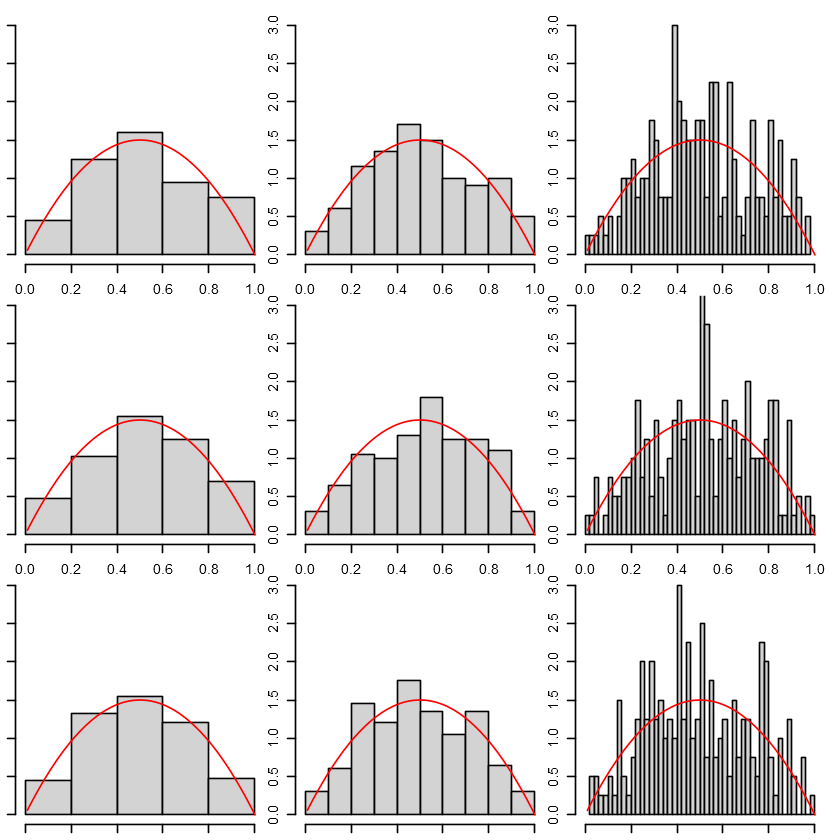

In [1]:
n <- 200

par(mfrow = c(3, 3))
par(mar = c(1, 1, 1, 1))

x_base <- seq(0.01,1,by = 0.01)
breaks_list = c(4, 12, 60)

for (ii in 1:3){
  x <- rbeta(n, 2, 2) # beta distribution
  for ( bb in breaks_list){
    hist(x, breaks = bb, main="", freq = FALSE, ylim = c(0,3),xlim = c(0,1))
    lines( y = dbeta( x_base, 2, 2), x = x_base , col = "red" )
  }
}

非参数估计的另一个例子是给定样本 $(y_i, x_i)$ 的条件均值$f(x) = E[y_i |x_i = x]$ 。这是我们在本科计量经济学第一课中遇到的例子。我们求解最小化函数：

$$
\min_f E[ (y_i - f(x_i) )^2 ]
$$

条件均值往往是非线性的函数。如果我们不了解 $(y_i,x_i)$ 背后的参数估计，估计 $f(x)$ 就变成了一个非参数的问题。在现实中，样本数量 $n$ 通常是有限的。样本最小化函数为：

$$
\min_f \sum_{i=1}^n (y_i - f(x_i) )^2.
$$

在求解最小值的时候，我们仍然需要约束函数的类型。如果我们假设 $f$ 是一个连续函数，我们可以使用基于密度估计的核 (kernel) 算法。
另一种方法是用级数展开来估计函数。级数展开会生成许多额外的估计量，我们就可以估计它们的系数。这是在线性回归的右边“创建”许多变量的方法。 
比如，任何的有界微分差分函数都有级数 $f(x) = \sum_{k=0}^{\infty} \beta_k \cos (\frac{k}{2}\pi x )$ 。在有限样本中，我们选择随意一个有限数字 $K$ (通常比 $n$ 小得多) 作为截断点。
当 $n \to \infty$ 时，$K \to \infty$ 于是：

$$
f_K(x) = \sum_{k=0}^{K} \beta_k \cos \left(\frac{k}{2}\pi x \right) \to f(x).
$$

在这个非参数估计中，同样存在偏误-方差的取舍。如果 $K$ 太大了, $f$ 过于灵活，它将会达到 $100\%$ 的样本内 R 平方。这对于样本外预测没有什么帮助。
这样的预测会有很小的偏误，但是有很大的方差。另一个极端是，一个非常小的 $K$ 会让 $f_K(x)$ 过于严苛，不能估计一般的非线性函数。它会有很大的偏误和较小的方差。

偏误-方差的权衡是控制计算效果的基本统计机制。因此我们需要用 **正则化** 在均方差中平衡二者。正则化的两种常见方法是选择带宽和展开级数的项数。
第三种正则化的方法是得到一个足够大的 $K$ ，然后加上一个惩罚项来控制级数的复杂性。最优化问题为：

$$
\min_\beta \  \frac{1}{2n}  \sum_{i=1}^n \left(y_i - \sum_{k=0}^{K} \beta_k f_k(x_i) \right)^2
+ \lambda \sum_{k=0}^K \beta_k^2,
$$

其中 $\lambda$ 是调谐参数，这样当 $n\to \infty$ 时 $\lambda \to 0$ ，且
$f_k(x_i) = \cos \left(\frac{k}{2}\pi x_i \right)$ 。为了简化符号，令 $y=(y_1,\ldots,y_n)'$ 且
$X = (X_{ik} = f_k(x_i) )$ ，上述问题可以被重写为：

$$
(2n)^{-1} (Y-X\beta)'(Y-X\beta) + \lambda \Vert \beta \Vert_2 ^2,
$$

上述的最优化函数有一个显性解 $\hat{\beta} = (X'X+\lambda I)^{-1} X'Y$ 。这是在20世纪70年代提出的 **岭回归** (ridge regression) 。
这里的惩罚方式和我们下个章节将要讨论的变量选择十分类似。

实际中会遇到的问题是，面对一个正则化问题，该如何选择调谐参数？这是一个学界普遍讨论的棘手的统计学问题。主流的理论是要么使用一个 **信息量准则** (例如赤池信息量 $\log\hat{\sigma}^2 + 2K$ 或者贝叶斯信息量 $\log\hat{\sigma}^2 + K\log n$ )，或者**交叉验证** 。


## 数据分割


机器学习的流程和计量经济学大不相同，它的核心的目的往往是预测而不是解释。
他们会选择一些现成的通用学习方法，然后用它们的预测效果来评估好坏。为了避免过度拟合的问题，我们还必须要设置一些调谐参数。

大多数的机器学习对于DGP都抱着不可知的观点。他们大方地承认模型的不确定性。为了处理模型选择的问题(调谐参数的选择)，
我们将充足的数据分成三个部分：一个 **训练数据集** 用来拟合模型(给定调谐参数)；一个 **验证数据集** 用来比较不同调谐参数得到的样本外预测的效果，它可以辅助我们确定目标调谐参数；
理想情况下，**测试样本** 应该是独立于模型的第三方。测试样本是测试模型拟合效果的最终评判标准。

R 包 `caret` (Classification And REgression Training) 提供了许多机器学习方法的框架。
函数 [`createDataPartition`] (https://topepo.github.io/caret/data-splitting.html)
能够帮助我们分割截面数据和时间序列数据。



### 交叉验证

一个 $S$ 折叠交叉验证把数据集分为 $S$ 个互不相交的部分。在每一次的迭代中，它挑选其中一个部分作为验证的样本，其他的 $S-1$ 个部分作为训练样本之后测算出拟合优度。例如 **均方预测误差** ${n_v}^{-1} \sum_{i \in val} (y_i - \hat{y}_i)^2$ ，其中 $val$ 是验证集，$n_v$ 是其元素的个数(cardinality)，或者 **绝对均值预测误差** ${n_v}^{-1}\sum_{i \in val} |y_i - \hat{y}_i|$。重复这个流程 $S$ 次使得每一个 $S$ 部分都被当做了验证样本， $S$ 个部分拟合优度的均值用来决定最优的调谐参数。如果 $S=n-1$，它被称为 **留一交叉验证**，但是当 $n$ 很大的时候，计算量过于庞大，因此在实际操作中，我们可以选择 $S=5$ 或 10，分别称为5折交叉验证和10折交叉验证。

"![Rolling window time series cross validation](graph/CV_Figure.png)"

在时间序列中， 交叉验证一定要保留相依结构 (dependence structure)。 如果时间序列是平稳的，我们可以把数据分为 $S$ 个连续的部分。 如果我们的目的是提前预测，那么我们可以用 **嵌套CV验证** 。该数据展示了一个有固定长度移动窗口的嵌套CV验证，而它的次级训练数据也同样可以是一个扩展滚动窗口。

## 参数选择与预测

在当代的学术研究中，协变量 $x_i$ 的数量可能非常庞大。DNA的基因晶片分析是一种寻找症状和基因之间联系的方法。生物学理论指出，仅有一小部分的基因会影响症状，但哪些是真正的罪魁祸首我们不得而知。变量选择就能帮助我们找出相关基因，之后我们就能思考如何通过编辑这些基因来预防特定的疾病并改善人们的生活。

一些的实证问题中有大量的解释变量，
例如[UK Living Costs and Food Survey](https://discover.ukdataservice.ac.uk/series/?sn=2000028) 的一个数千个问题的问卷。该调查被广泛用于需求理论和家庭消费的研究。
{cite}`giannone2017economic`[link](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3031893) 在6个常用数据集当中测试了变量选择方法。

**模型选择风险** 阐述了为了追求显著性，从两个模型中选择 $t$ 统计量时检验规模失真的问题。

$$
\begin{pmatrix}y\\
x_{1}\\
x_{2}
\end{pmatrix}\sim N\left(0,\begin{pmatrix}1 & 0 & 0\\
0 & 1 & \sqrt{0.5}\\
0 & \sqrt{0.5} & 1
\end{pmatrix}\right)
$$

$x_1$ 和 $x_2$ 都独立于 $y$ 。检验规模取决于两个回归量的相关性。
如果只在一个模型中实行检验，那么规模是预先设定的10%。
如果我们尝试检验两个模型，规模会扩大到大约17%。

In [3]:
n <- 100
Rep <- 5000

t_stat <- function(y, x) {
  beta_hat <- sum(x * y) / sum(x^2)
  e_hat <- y - beta_hat * x
  sigma2_hat <- var(e_hat)
  t_stat <- beta_hat / sqrt(sigma2_hat / sum(x^2))
  return(t_stat)
}

res <- matrix(NA, Rep, 2)

for (r in 1:Rep) {
  y <- rnorm(n)
  x1 <- rnorm(n)
  x2 <- sqrt(0.5) * x1 + sqrt(0.5) * rnorm(n)

  res[r, ] <- c(t_stat(y, x1), t_stat(y, x2))
}

print(mean(apply(abs(res), 1, max) > qnorm(0.95)))

[1] 0.1706


应用经济学家经常依赖过往经验挑选模型的变量，但他们却总是很抗拒变量选择问题。近年来，经济学家逐渐意识到了先前在这一领域的疏忽。
{cite}`stock2012generalized` 应用了一系列的变量选择方法，预测了 143 个美国的宏观指标。

回归问题中最知名的变量选择方法是Lasso回归模型(least-absolute-shrinkage-and-selection-operator) {cite}`tibshirani1996regression`。
在常规的OLS标准函数的基础上，Lasso为系数的模 $L_1$ 增加了惩罚机制。Lasso的标准函数可以写作：

$$
(2n)^{-1} (Y-X\beta)'(Y-X\beta) + \lambda \Vert \beta \Vert_1
$$

其中 $\lambda \geq 0$ 是一个调谐参数。 与OLS和岭回归不同， Lasso没有一个封闭解。幸运的是，它是一个凸优化问题，因此在高维参数的问题中，它的最优化计算方便又可靠。

在一系列 $\lambda$ 值中，Lasso 可以把一些系数压缩到0，也就表明了这些参数很可能与回归无关。这样的算法与我们求解微观经济学中效用最大化的 **角点解** 类似。在理论研究方面，{cite}`zou2006adaptive`发现Lasso无法在所有的情况下区分相关变量和不相关变量。


"![lasso](graph/lasso_regression2.png)"

"![SCAD](graph/SCAD.png)"

另一个有效的变量选择方法是SCAD(smoothly-clipped-absolute-deviation)
{cite}`fan2001variable`。 其目标函数为：

$$
(2n)^{-1} (Y-X\beta)'(Y-X\beta) + \sum_{j=1}^d \rho_{\lambda}( |\beta_j| )
$$

当 $a>2$ 和 $\theta>0$ 有： 

$$
\rho_{\lambda}^{\prime} (\theta) = \lambda \left\{ 1\{\theta\leq \lambda \} +
\frac{(a\lambda - \theta)_+}{(a-1)\lambda} \cdot 1 \{\theta > \lambda\} \right\}.
$$

这是一个非凸函数。{cite}`fan2001variable`提出了所谓的
**神谕性质**。 具有神谕性质的估计量能够同时拥有变量选择的一致性和(逐点)渐近正态性。

之后提出的 **自适应 Lasso** (adaptive lasso){cite}`zou2006adaptive`同样具有神谕性质。
自适应 Lasso 有两个步骤: 1. 首先进行Lasso或者岭回归，得到估计量 $\hat{\beta}^{(1)}$. 2. 解

$$
(2n)^{-1} (Y-X\beta)'(Y-X\beta) + \lambda \sum_{j=1}^d  w_j |\beta_j|
$$

其中 $w_j = 1 \bigg/ \left|\hat{\beta}_j^{(1)}\right|^a$ 和 $a\geq 1$ 是常数(通常 $a = 1$ or 2)。


在R中, `glmnet` 或者 `LARS` 能够实现Lasso， `ncvreg` 可以运行 SCAD。 自适应 Lasso可以在`glmnet` 中用 `penalty.factor` 设置权重来实现。

ERROR: Error in (y_new - predict(lasso_result, newx = x_new)) %>% var(): could not find function "%>%"


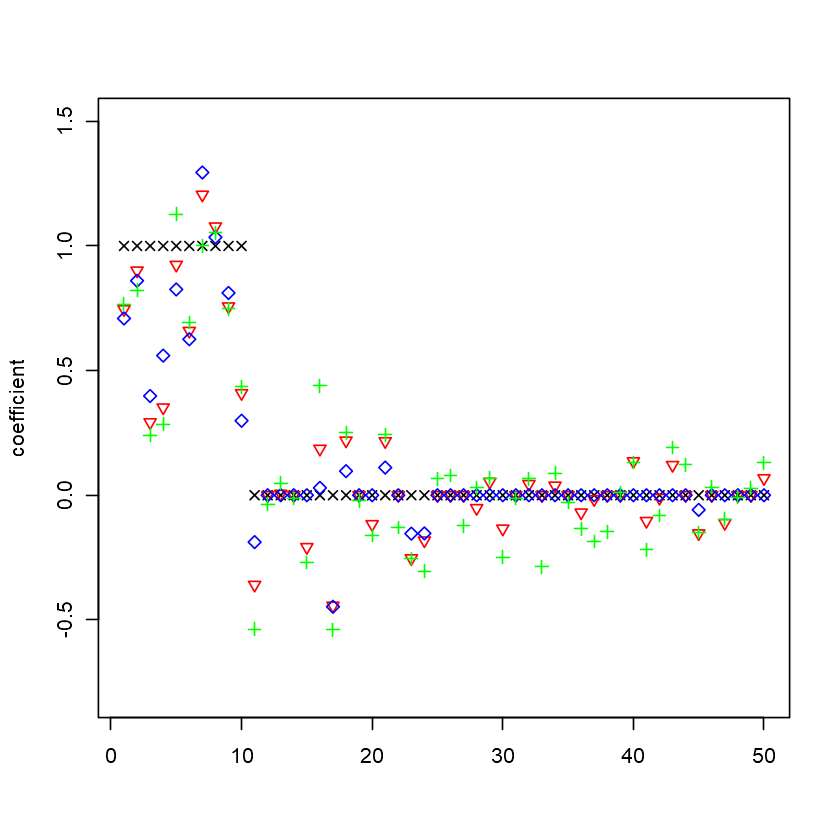

In [4]:
n <- 40
p <- 50
b0 <- c(rep(1, 10), rep(0, p - 10))
x <- matrix(rnorm(n * p), n, p)
y <- x %*% b0 + rnorm(n)

ols <- MASS::ginv(t(x) %*% x) %*% (t(x) %*% y) # OLS
# Implement Lasso by glmnet
cv_lasso <- glmnet::cv.glmnet(x, y)
lasso_result <- glmnet::glmnet(x, y, lambda = cv_lasso$lambda.min)

# Get weights
b_temp <- as.numeric(lasso_result$beta)
b_temp[b_temp == 0] <- 1e-8
w <- 1 / abs(b_temp) # Let gamma = 1

# Implement Adaptive Lasso by glmnet
cv_alasso <- glmnet::cv.glmnet(x, y, penalty.factor = w)
alasso_result <-
  glmnet::glmnet(x, y, penalty.factor = w, lambda = cv_alasso$lambda.min)

plot(b0, ylim = c(-0.8, 1.5), pch = 4, xlab = "", ylab = "coefficient")
points(lasso_result$beta, col = "red", pch = 6)
points(alasso_result$beta, col = "blue", pch = 5)
points(ols, col = "green", pch = 3)

# out of sample prediction
x_new <- matrix(rnorm(n * p), n, p)
y_new <- x_new %*% b0 + rnorm(n)
lasso_msfe <- (y_new - predict(lasso_result, newx = x_new)) %>% var()
alasso_msfe <- (y_new - predict(alasso_result, newx = x_new)) %>% var()
ols_msfe <- (y_new - x_new %*% ols) %>% var()

print(c(lasso_msfe, alasso_msfe, ols_msfe))

我们可以用CVXR自己编写Lasso：

In [5]:
library(CVXR)

lambda <- 2 * cv_lasso$lambda.min # tuning parameter

# CVXR for Lasso
beta_cvxr <- Variable(p)
obj <- sum_squares(y - x %*% beta_cvxr) / (2 * n) + lambda * p_norm(beta_cvxr, 1)
prob <- Problem(Minimize(obj))
lasso_cvxr <- solve(prob)
beta_cvxr_hat <- lasso_cvxr$getValue(beta_cvxr) %>% as.vector() %>% print()


Warning message:
"package 'CVXR' was built under R version 4.1.3"

Attaching package: 'CVXR'


The following object is masked from 'package:stats':

    power




ERROR: Error in lasso_cvxr$getValue(beta_cvxr) %>% as.vector() %>% print(): could not find function "%>%"


实际上，如果回归的唯一目的是预测响应变量的话，有更多的方法可供选择。一个符合直觉的方法是 **前向分布回归** (*stagewise forward selection*)。
我们首先将所有的系数设为0，然后给定许多候选自变量 $x_j$ ，在每一轮中我们加入能够得到最大的 $R^2$ 的回归量。这个方法和 $L_2$ 成分增强的思路类似，不调整先前拟合的系数。


## 计量经济学中的压缩估计

* {cite}`su2016identifying`: 将压缩估计用于分类
* {cite}`shi2016estimation`: 求解了GMM Lasso的收敛速度
* {cite}`lee2018`: 预测回归中的Lasso和自适应Lasso
* {cite}`shi2019forward`: 前向选择
* {cite}`shi2020high`: 预测组合中的潜在群

## 实证应用
* {cite}`lehrer2017box`: 电影票房
* {cite}`feng2019taming`: 因子动物园，比较不同的机器学习方法
* {cite}`chinco2017sparse`: 金融市场，Lasso预测


## 拓展阅读

* {cite}`Efron and Hastie`: 第16章
* {cite}`athey2018impact`

